Task #0: Read Excel Files (GCAM & MESSAGE & REMIND)

Task #1: Extract the time-series data for the following variables across all countries and all scenarios (e.g., below 2°, current policy, etc.): Primary Energy|Coal Primary Energy|Gas Primary Energy|Oil Secondary Energy|Electricity|Coal Secondary Energy|Electricity|Biomass Secondary Energy|Electricity|Nuclear Secondary Energy|Electricity|Solar Secondary Energy|Electricity|Wind Secondary Energy|Electricity|Hydro Secondary Energy|Electricity|Gas Secondary Energy|Electricity|Oil



Task #2: The datapoints are just in 5 year intervals —> can you extrapolate those yearly following a simple linear trend. Can you also calculate the yearly change of rate in %. 

Task#3: For (i) Can Primary Energy|Coal, (ii) Primary Energy|Gas, (ii) Primary Energy|Oil can you transform all the data points from the unit EJ/year into million tonnes of coal (for coal), into million barrels per year (for oil) and into million cubic meter (m^3) per year (for gas) respectively. You can use standard formulas (e.g., here https://www.convertunits.com/from/EJ/to/tonne+of+coal+equivalent). 

1 EJ to tonne of coal equivalent = 34120842.37536 tonne of coal equivalent = 34.1208423754 million tonnes of coal; 
1 EJ = 163452108.5322 barrel of oil (BOE) = 163.4521085322 million barrels; 
1 EJ = 27.93 million cubic meters of natural gas

Task#4: For secondary energy across all technologies can you transform from EJ/y into MW/h. 

1 EJ = 277777777.77778 MWh (https://www.convertunits.com/from/EJ/to/megawatt-hour) 

Secondary Energy|Electricity|Coal; 
Secondary Energy|Electricity|Biomass;
Secondary Energy|Electricity|Nuclear;
Secondary Energy|Electricity|Solar;
Secondary Energy|Electricity|Wind;
Secondary Energy|Electricity|Hydro;
Secondary Energy|Electricity|Gas;
Secondary Energy|Electricity|Oil

In [1]:
import pandas as pd
import geopandas as gpd
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt


In [2]:
GCAM = "Downscaled_GCAM 6.0 NGFS_data.xlsx"
MESSAGE = "Downscaled_MESSAGEix-GLOBIOM 1.1-M-R12_data.xlsx"
REMIND = "Downscaled_REMIND-MAgPIE 3.2-4.6_data.xlsx"


df = pd.read_excel(GCAM)      #input the name of the Excel file


df.head()

,Model,Scenario,Region,Variable,Unit,2020,2021,2022,2023,2024,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Downscaling[GCAM 6.0 NGFS],Delayed transition,AGO,Carbon Sequestration|CCS,Mt CO2/yr,0.0001,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Downscaling[GCAM 6.0 NGFS],Delayed transition,AGO,Carbon Sequestration|CCS|Biomass,Mt CO2/yr,0.0000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Downscaling[GCAM 6.0 NGFS],Delayed transition,AGO,Carbon Sequestration|CCS|Fossil,Mt CO2/yr,0.0001,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Downscaling[GCAM 6.0 NGFS],Delayed transition,AGO,Carbon Sequestration|CCS|Industrial Processes,Mt CO2/yr,0.0000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Downscaling[GCAM 6.0 NGFS],Delayed transition,AGO,Emissions|CO2,Mt CO2/yr,-1.6518,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
filtered_df = df.loc[(df['Variable'] == 'Primary Energy|Gas') | (df['Variable'] == 'Primary Energy|Oil')| (df['Variable'] == 'Secondary Energy|Electricity|Coal')| (df['Variable'] == 'Secondary Energy|Electricity|Biomass') | (df['Variable'] == 'Secondary Energy|Electricity|Nuclear')| (df['Variable'] == 'Secondary Energy|Electricity|Solar')| (df['Variable'] == 'Secondary Energy|Electricity|Wind')| (df['Variable'] == 'Secondary Energy|Electricity|Hydro')| (df['Variable'] == 'Secondary Energy|Electricity|Gas')|(df['Variable'] == 'Secondary Energy|Electricity|Oil')]

#Extrapolate
#df_selected = filtered_df.iloc[:, 5:]

# Interpolate the NaN values in the specific columns
years = [str(year) for year in range(2020, 2101)]
filtered_df[years] = filtered_df[years].interpolate(method='linear', axis=1)
df_selected = filtered_df[years]
df_selected.to_excel('Interpolated-GCAM.xlsx', index=False)
    

# Calculate yearly percent change for each row
pct_change_df = df_selected.pct_change(axis=1) * 100
pct_change_df = pct_change_df.fillna(0)

#pct_change_df



#First concatenate extrapolated data with filtered data frame
first_5_columns = filtered_df.iloc[:, :5]

concatenated_df = pd.concat([first_5_columns, df_selected], axis=1)
#concatenated_df_REMIND.head()




# Define the constant to multiply for unit conversion
constant_coal = 34.12084237536         #million tonnes of coal
constant_gas = 27.93                   #million cubic meters of natural gas
constant_oil = 163.4521085322          #million barrels of oil


# Iterate over the DataFrame 
for index, row in concatenated_df.iterrows():
  
    if row['Variable'] == 'Primary Energy|Coal':
        #print(row)
        concatenated_df.loc[index, concatenated_df.columns[5:]] *= constant_coal       #Multiply columns starting from Year 2020
        concatenated_df.loc[index, 'Unit'] = 'million tonnes of coal'                         # Change the unit    

    
    if row['Variable'] == 'Primary Energy|Gas':
        #print(row)
        concatenated_df.loc[index, concatenated_df.columns[5:]] *= constant_gas       #Multiply columns starting from column 6
        concatenated_df.loc[index, 'Unit'] = 'million cubic meters of natural gas'           # Change the value in column 5

    if row['Variable'] == 'Primary Energy|Oil':
        #print(row)
        concatenated_df.loc[index, concatenated_df.columns[5:]] *= constant_oil       #Multiply columns starting from Year 2020
        concatenated_df.loc[index, 'Unit'] = 'million barrels of oil'                         # Change the unit    


#print(concatenated_df)



#Unit conversion for secondary energy sources

constant_MWh = 277777777.77778 

# Iterate over the DataFrame 
for index, row in concatenated_df.iterrows():
  
    if row['Variable'] == 'Secondary Energy|Electricity|Coal' or row['Variable'] == 'Secondary Energy|Electricity|Biomass' or row['Variable'] == 'Secondary Energy|Electricity|Nuclear' or row['Variable'] == 'Secondary Energy|Electricity|Solar' or row['Variable'] == 'Secondary Energy|Electricity|Wind' or row['Variable'] == 'Secondary Energy|Electricity|Hydro' or row['Variable'] == 'Secondary Energy|Electricity|Gas' or row['Variable'] == 'Secondary Energy|Electricity|Oil':

        #print(row)
        concatenated_df.loc[index, concatenated_df.columns[5:]] *= constant_MWh       #Multiply columns starting from Year 2020
        concatenated_df.loc[index, 'Unit'] = 'MWh'                                           # Change the unit    

concatenated_df.head()



/var/folders/9y/ysnmb6qs52z1c6ylqzjshj880000gn/T/ipykernel_1940/3313194465.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[years] = filtered_df[years].interpolate(method='linear', axis=1)


,Model,Scenario,Region,Variable,Unit,2020,2021,2022,2023,2024,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
82,Downscaling[GCAM 6.0 NGFS],Delayed transition,AGO,Primary Energy|Gas,million cubic meters of natural gas,0.726180,0.758579,0.790978,0.823376,0.855775,...,3.063921,3.063921,3.063921,3.063921,3.063921,3.063921,3.063921,3.063921,3.063921,3.063921
86,Downscaling[GCAM 6.0 NGFS],Delayed transition,AGO,Primary Energy|Oil,million barrels of oil,41.124551,40.817261,40.509971,40.202681,39.895391,...,35.338346,35.338346,35.338346,35.338346,35.338346,35.338346,35.338346,35.338346,35.338346,35.338346
97,Downscaling[GCAM 6.0 NGFS],Delayed transition,AGO,Secondary Energy|Electricity|Biomass,MWh,0.000000,0.000000,0.000000,0.000000,0.000000,...,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778
98,Downscaling[GCAM 6.0 NGFS],Delayed transition,AGO,Secondary Energy|Electricity|Coal,MWh,111111.111111,127777.777778,144444.444444,161111.111111,177777.777778,...,166666.666667,166666.666667,166666.666667,166666.666667,166666.666667,166666.666667,166666.666667,166666.666667,166666.666667,166666.666667
99,Downscaling[GCAM 6.0 NGFS],Delayed transition,AGO,Secondary Energy|Electricity|Gas,MWh,166666.666667,183333.333333,200000.000000,216666.666667,233333.333333,...,555555.555556,555555.555556,555555.555556,555555.555556,555555.555556,555555.555556,555555.555556,555555.555556,555555.555556,555555.555556


In [70]:
concatenated_df.to_excel('GCAM_output.xlsx', index=False)

In [4]:
concatenated_df.head()

,Model,Scenario,Region,Variable,Unit,2020,2021,2022,2023,2024,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
82,Downscaling[GCAM 6.0 NGFS],Delayed transition,AGO,Primary Energy|Gas,EJ/yr,0.0260,0.02716,0.02832,0.02948,0.03064,...,0.1097,0.1097,0.1097,0.1097,0.1097,0.1097,0.1097,0.1097,0.1097,0.1097
86,Downscaling[GCAM 6.0 NGFS],Delayed transition,AGO,Primary Energy|Oil,EJ/yr,0.2516,0.24972,0.24784,0.24596,0.24408,...,0.2162,0.2162,0.2162,0.2162,0.2162,0.2162,0.2162,0.2162,0.2162,0.2162
97,Downscaling[GCAM 6.0 NGFS],Delayed transition,AGO,Secondary Energy|Electricity|Biomass,EJ/yr,0.0000,0.00000,0.00000,0.00000,0.00000,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
98,Downscaling[GCAM 6.0 NGFS],Delayed transition,AGO,Secondary Energy|Electricity|Coal,EJ/yr,0.0004,0.00046,0.00052,0.00058,0.00064,...,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006
99,Downscaling[GCAM 6.0 NGFS],Delayed transition,AGO,Secondary Energy|Electricity|Gas,EJ/yr,0.0006,0.00066,0.00072,0.00078,0.00084,...,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020


CARBON EMISSIONS FOR "NET ZERO 2050 SCENARIO"

In [5]:
df_nz = concatenated_df[concatenated_df["Scenario"] == "Net Zero 2050"]

In [6]:
df_coal = df_nz[df_nz["Variable"] == "Secondary Energy|Electricity|Coal"]
df_coal

,Model,Scenario,Region,Variable,Unit,2020,2021,2022,2023,2024,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
111175,Downscaling[GCAM 6.0 NGFS],Net Zero 2050,AGO,Secondary Energy|Electricity|Coal,MWh,1.666667e+05,1.833333e+05,2.000000e+05,2.166667e+05,2.333333e+05,...,3.888889e+05,3.888889e+05,3.888889e+05,3.888889e+05,3.888889e+05,3.888889e+05,3.888889e+05,3.888889e+05,3.888889e+05,3.888889e+05
111336,Downscaling[GCAM 6.0 NGFS],Net Zero 2050,ALB,Secondary Energy|Electricity|Coal,MWh,5.555556e+04,6.111111e+04,6.666667e+04,7.222222e+04,7.777778e+04,...,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04
111498,Downscaling[GCAM 6.0 NGFS],Net Zero 2050,ARE,Secondary Energy|Electricity|Coal,MWh,3.055556e+05,3.166667e+05,3.277778e+05,3.388889e+05,3.500000e+05,...,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04
111993,Downscaling[GCAM 6.0 NGFS],Net Zero 2050,ARG,Secondary Energy|Electricity|Coal,MWh,2.000000e+06,2.005556e+06,2.011111e+06,2.016667e+06,2.022222e+06,...,8.333333e+04,8.333333e+04,8.333333e+04,8.333333e+04,8.333333e+04,8.333333e+04,8.333333e+04,8.333333e+04,8.333333e+04,8.333333e+04
112190,Downscaling[GCAM 6.0 NGFS],Net Zero 2050,ARM,Secondary Energy|Electricity|Coal,MWh,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,...,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137823,Downscaling[GCAM 6.0 NGFS],Net Zero 2050,VNM,Secondary Energy|Electricity|Coal,MWh,7.855556e+07,7.790000e+07,7.724444e+07,7.658889e+07,7.593333e+07,...,9.555556e+06,9.555556e+06,9.555556e+06,9.555556e+06,9.555556e+06,9.555556e+06,9.555556e+06,9.555556e+06,9.555556e+06,9.555556e+06
137975,Downscaling[GCAM 6.0 NGFS],Net Zero 2050,YEM,Secondary Energy|Electricity|Coal,MWh,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
138467,Downscaling[GCAM 6.0 NGFS],Net Zero 2050,ZAF,Secondary Energy|Electricity|Coal,MWh,1.953056e+08,1.877667e+08,1.802278e+08,1.726889e+08,1.651500e+08,...,2.250000e+06,2.250000e+06,2.250000e+06,2.250000e+06,2.250000e+06,2.250000e+06,2.250000e+06,2.250000e+06,2.250000e+06,2.250000e+06
138661,Downscaling[GCAM 6.0 NGFS],Net Zero 2050,ZMB,Secondary Energy|Electricity|Coal,MWh,1.111111e+05,1.055556e+05,1.000000e+05,9.444444e+04,8.888889e+04,...,1.333333e+06,1.333333e+06,1.333333e+06,1.333333e+06,1.333333e+06,1.333333e+06,1.333333e+06,1.333333e+06,1.333333e+06,1.333333e+06


In [74]:
df_coal.columns

Index(['Model', 'Scenario', 'Region', 'Variable', 'Unit', '2020', '2021',
       '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030',
       '2031', '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039',
       '2040', '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048',
       '2049', '2050', '2051', '2052', '2053', '2054', '2055', '2056', '2057',
       '2058', '2059', '2060', '2061', '2062', '2063', '2064', '2065', '2066',
       '2067', '2068', '2069', '2070', '2071', '2072', '2073', '2074', '2075',
       '2076', '2077', '2078', '2079', '2080', '2081', '2082', '2083', '2084',
       '2085', '2086', '2087', '2088', '2089', '2090', '2091', '2092', '2093',
       '2094', '2095', '2096', '2097', '2098', '2099', '2100'],
      dtype='object')

## Net zero country calculations

In [8]:
#Create a dictionary for emissions intensity data
df_country_emission_factors = pd.read_excel('filtered_2020_data.xlsx')

country_emission_factors_dict = df_country_emission_factors.set_index('Code')['Carbon intensity of electricity - gCO2/kWh'].to_dict()

#print(country_emission_factors_dict)

In [9]:
country_emission_factors_dict

{nan: 551.4689,
 'AFG': 125.0,
 'ALB': 24.482107,
 'DZA': 633.6784,
 'ASM': 647.0588,
 'AGO': 171.32661,
 'ATG': 628.5714,
 'ARG': 394.7041,
 'ARM': 251.3089,
 'ABW': 556.70105,
 'AUS': 642.33466,
 'AUT': 133.40092,
 'AZE': 680.0,
 'BHS': 658.41583,
 'BHR': 904.4052,
 'BGD': 677.21375,
 'BRB': 613.2075,
 'BLR': 498.7026,
 'BEL': 166.85545,
 'BLZ': 214.2857,
 'BEN': 595.95953,
 'BMU': 644.06775,
 'BTN': 23.463686,
 'BOL': 482.9317,
 'BIH': 711.1375,
 'BWA': 848.62384,
 'BRA': 133.35773,
 'VGB': 687.5,
 'BRN': 895.4704,
 'BGR': 383.9063,
 'BFA': 472.97296,
 'BDI': 212.12122,
 'KHM': 437.6392,
 'CMR': 314.44446,
 'CAN': 160.64651,
 'CPV': 547.6191,
 'CYM': 637.68115,
 'CAF': 0.0,
 'TCD': 628.5714,
 'CHL': 436.3987,
 'CHN': 606.25757,
 'COL': 273.20514,
 'COM': 692.3078,
 'COG': 691.90607,
 'COK': 500.0,
 'CRI': 27.280478,
 'CIV': 396.09235,
 'HRV': 226.75739,
 'CUB': 638.32025,
 'CYP': 581.4433,
 'CZE': 460.1748,
 'COD': 25.083612,
 'DNK': 188.94333,
 'DJI': 692.3078,
 'DMA': 500.0,
 'DOM

In [11]:
df_coal.head()

,Model,Scenario,Region,Variable,Unit,2020,2021,2022,2023,2024,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
111175,Downscaling[GCAM 6.0 NGFS],Net Zero 2050,AGO,Secondary Energy|Electricity|Coal,MWh,1.666667e+05,1.833333e+05,2.000000e+05,2.166667e+05,2.333333e+05,...,388888.888889,388888.888889,388888.888889,388888.888889,388888.888889,388888.888889,388888.888889,388888.888889,388888.888889,388888.888889
111336,Downscaling[GCAM 6.0 NGFS],Net Zero 2050,ALB,Secondary Energy|Electricity|Coal,MWh,5.555556e+04,6.111111e+04,6.666667e+04,7.222222e+04,7.777778e+04,...,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778
111498,Downscaling[GCAM 6.0 NGFS],Net Zero 2050,ARE,Secondary Energy|Electricity|Coal,MWh,3.055556e+05,3.166667e+05,3.277778e+05,3.388889e+05,3.500000e+05,...,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778
111993,Downscaling[GCAM 6.0 NGFS],Net Zero 2050,ARG,Secondary Energy|Electricity|Coal,MWh,2.000000e+06,2.005556e+06,2.011111e+06,2.016667e+06,2.022222e+06,...,83333.333333,83333.333333,83333.333333,83333.333333,83333.333333,83333.333333,83333.333333,83333.333333,83333.333333,83333.333333
112190,Downscaling[GCAM 6.0 NGFS],Net Zero 2050,ARM,Secondary Energy|Electricity|Coal,MWh,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,...,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778


In [12]:
i = 5
for code in df_coal['Region']:
    print(code)
    i -= 1
    if i == 0:
        break

AGO
ALB
ARE
ARG
ARM


In [16]:
# Function to get emission intensity by country code
def get_emission_intensity(code):
    return country_emission_factors_dict.get(code, "Code not found")

for code in df_coal['Region']:
    intensity = get_emission_intensity(code)
    print(f"Emission intensity for {code}: {intensity} gCO2/kWh")

Emission intensity for AGO: 171.32661 gCO2/kWh
Emission intensity for ALB: 24.482107 gCO2/kWh
Emission intensity for ARE: 645.08374 gCO2/kWh
Emission intensity for ARG: 394.7041 gCO2/kWh
Emission intensity for ARM: 251.3089 gCO2/kWh
Emission intensity for AUS: 642.33466 gCO2/kWh
Emission intensity for AUT: 133.40092 gCO2/kWh
Emission intensity for AZE: 680.0 gCO2/kWh
Emission intensity for BEL: 166.85545 gCO2/kWh
Emission intensity for BEN: 595.95953 gCO2/kWh
Emission intensity for BGD: 677.21375 gCO2/kWh
Emission intensity for BGR: 383.9063 gCO2/kWh
Emission intensity for BHR: 904.4052 gCO2/kWh
Emission intensity for BIH: 711.1375 gCO2/kWh
Emission intensity for BLR: 498.7026 gCO2/kWh
Emission intensity for BOL: 482.9317 gCO2/kWh
Emission intensity for BRA: 133.35773 gCO2/kWh
Emission intensity for BRN: 895.4704 gCO2/kWh
Emission intensity for BWA: 848.62384 gCO2/kWh
Emission intensity for CAN: 160.64651 gCO2/kWh
Emission intensity for CHE: 35.041615 gCO2/kWh
Emission intensity for CH

In [17]:
df_coal.head()

,Model,Scenario,Region,Variable,Unit,2020,2021,2022,2023,2024,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
111175,Downscaling[GCAM 6.0 NGFS],Net Zero 2050,AGO,Secondary Energy|Electricity|Coal,MWh,1.666667e+05,1.833333e+05,2.000000e+05,2.166667e+05,2.333333e+05,...,388888.888889,388888.888889,388888.888889,388888.888889,388888.888889,388888.888889,388888.888889,388888.888889,388888.888889,388888.888889
111336,Downscaling[GCAM 6.0 NGFS],Net Zero 2050,ALB,Secondary Energy|Electricity|Coal,MWh,5.555556e+04,6.111111e+04,6.666667e+04,7.222222e+04,7.777778e+04,...,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778
111498,Downscaling[GCAM 6.0 NGFS],Net Zero 2050,ARE,Secondary Energy|Electricity|Coal,MWh,3.055556e+05,3.166667e+05,3.277778e+05,3.388889e+05,3.500000e+05,...,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778
111993,Downscaling[GCAM 6.0 NGFS],Net Zero 2050,ARG,Secondary Energy|Electricity|Coal,MWh,2.000000e+06,2.005556e+06,2.011111e+06,2.016667e+06,2.022222e+06,...,83333.333333,83333.333333,83333.333333,83333.333333,83333.333333,83333.333333,83333.333333,83333.333333,83333.333333,83333.333333
112190,Downscaling[GCAM 6.0 NGFS],Net Zero 2050,ARM,Secondary Energy|Electricity|Coal,MWh,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,2.777778e+04,...,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778,27777.777778


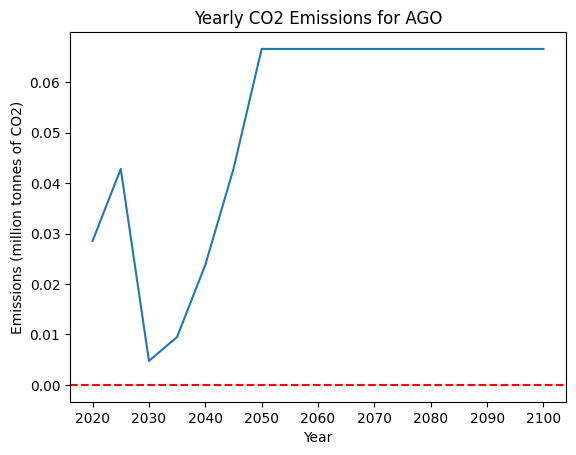

[0.02855444 0.03140988 0.03426532 0.03712077 0.03997621 0.04283165
 0.03521714 0.02760262 0.0199881  0.01237359 0.00475907 0.00571089
 0.0066627  0.00761452 0.00856633 0.00951815 0.01237359 0.01522903
 0.01808448 0.02093992 0.02379536 0.02760262 0.03140988 0.03521714
 0.03902439 0.04283165 0.04759073 0.0523498  0.05710887 0.06186794
 0.06662702 0.06662702 0.06662702 0.06662702 0.06662702 0.06662702
 0.06662702 0.06662702 0.06662702 0.06662702 0.06662702 0.06662702
 0.06662702 0.06662702 0.06662702 0.06662702 0.06662702 0.06662702
 0.06662702 0.06662702 0.06662702 0.06662702 0.06662702 0.06662702
 0.06662702 0.06662702 0.06662702 0.06662702 0.06662702 0.06662702
 0.06662702 0.06662702 0.06662702 0.06662702 0.06662702 0.06662702
 0.06662702 0.06662702 0.06662702 0.06662702 0.06662702 0.06662702
 0.06662702 0.06662702 0.06662702 0.06662702 0.06662702 0.06662702
 0.06662702 0.06662702 0.06662702]


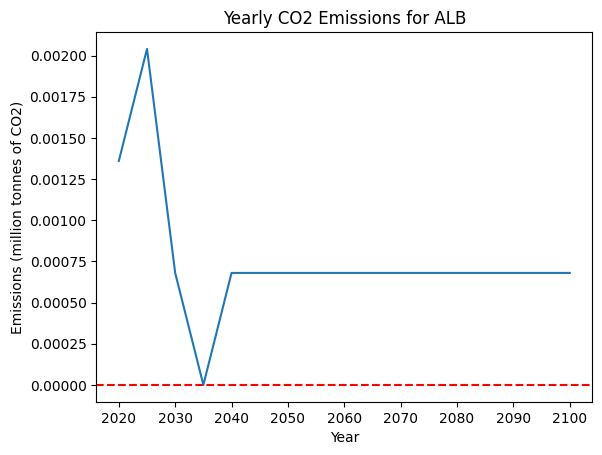

[0.00136012 0.00149613 0.00163214 0.00176815 0.00190416 0.00204018
 0.00176815 0.00149613 0.00122411 0.00095208 0.00068006 0.00054405
 0.00040804 0.00027202 0.00013601 0.         0.00013601 0.00027202
 0.00040804 0.00054405 0.00068006 0.00068006 0.00068006 0.00068006
 0.00068006 0.00068006 0.00068006 0.00068006 0.00068006 0.00068006
 0.00068006 0.00068006 0.00068006 0.00068006 0.00068006 0.00068006
 0.00068006 0.00068006 0.00068006 0.00068006 0.00068006 0.00068006
 0.00068006 0.00068006 0.00068006 0.00068006 0.00068006 0.00068006
 0.00068006 0.00068006 0.00068006 0.00068006 0.00068006 0.00068006
 0.00068006 0.00068006 0.00068006 0.00068006 0.00068006 0.00068006
 0.00068006 0.00068006 0.00068006 0.00068006 0.00068006 0.00068006
 0.00068006 0.00068006 0.00068006 0.00068006 0.00068006 0.00068006
 0.00068006 0.00068006 0.00068006 0.00068006 0.00068006 0.00068006
 0.00068006 0.00068006 0.00068006]


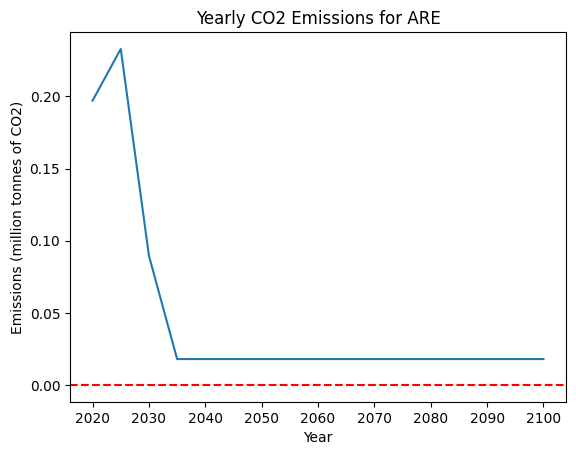

[0.19710892 0.20427652 0.21144411 0.21861171 0.22577931 0.23294691
 0.20427652 0.17560613 0.14693574 0.11826535 0.08959496 0.07525977
 0.06092458 0.04658938 0.03225419 0.01791899 0.01791899 0.01791899
 0.01791899 0.01791899 0.01791899 0.01791899 0.01791899 0.01791899
 0.01791899 0.01791899 0.01791899 0.01791899 0.01791899 0.01791899
 0.01791899 0.01791899 0.01791899 0.01791899 0.01791899 0.01791899
 0.01791899 0.01791899 0.01791899 0.01791899 0.01791899 0.01791899
 0.01791899 0.01791899 0.01791899 0.01791899 0.01791899 0.01791899
 0.01791899 0.01791899 0.01791899 0.01791899 0.01791899 0.01791899
 0.01791899 0.01791899 0.01791899 0.01791899 0.01791899 0.01791899
 0.01791899 0.01791899 0.01791899 0.01791899 0.01791899 0.01791899
 0.01791899 0.01791899 0.01791899 0.01791899 0.01791899 0.01791899
 0.01791899 0.01791899 0.01791899 0.01791899 0.01791899 0.01791899
 0.01791899 0.01791899 0.01791899]


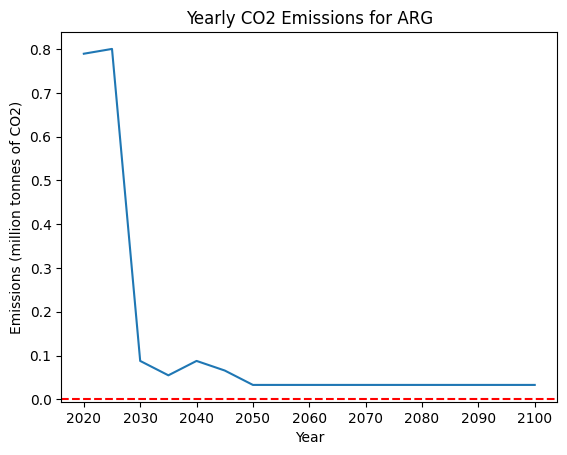

[0.7894082  0.791601   0.7937938  0.7959866  0.7981794  0.8003722
 0.65784017 0.51530813 0.37277609 0.23024406 0.08771202 0.08113362
 0.07455522 0.06797682 0.06139842 0.05482001 0.06139842 0.06797682
 0.07455522 0.08113362 0.08771202 0.08332642 0.07894082 0.07455522
 0.07016962 0.06578402 0.05920562 0.05262721 0.04604881 0.03947041
 0.03289201 0.03289201 0.03289201 0.03289201 0.03289201 0.03289201
 0.03289201 0.03289201 0.03289201 0.03289201 0.03289201 0.03289201
 0.03289201 0.03289201 0.03289201 0.03289201 0.03289201 0.03289201
 0.03289201 0.03289201 0.03289201 0.03289201 0.03289201 0.03289201
 0.03289201 0.03289201 0.03289201 0.03289201 0.03289201 0.03289201
 0.03289201 0.03289201 0.03289201 0.03289201 0.03289201 0.03289201
 0.03289201 0.03289201 0.03289201 0.03289201 0.03289201 0.03289201
 0.03289201 0.03289201 0.03289201 0.03289201 0.03289201 0.03289201
 0.03289201 0.03289201 0.03289201]


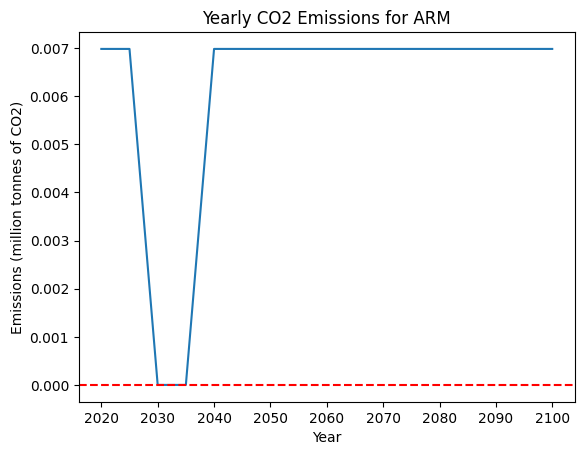

[0.0069808  0.0069808  0.0069808  0.0069808  0.0069808  0.0069808
 0.00558464 0.00418848 0.00279232 0.00139616 0.         0.
 0.         0.         0.         0.         0.00139616 0.00279232
 0.00418848 0.00558464 0.0069808  0.0069808  0.0069808  0.0069808
 0.0069808  0.0069808  0.0069808  0.0069808  0.0069808  0.0069808
 0.0069808  0.0069808  0.0069808  0.0069808  0.0069808  0.0069808
 0.0069808  0.0069808  0.0069808  0.0069808  0.0069808  0.0069808
 0.0069808  0.0069808  0.0069808  0.0069808  0.0069808  0.0069808
 0.0069808  0.0069808  0.0069808  0.0069808  0.0069808  0.0069808
 0.0069808  0.0069808  0.0069808  0.0069808  0.0069808  0.0069808
 0.0069808  0.0069808  0.0069808  0.0069808  0.0069808  0.0069808
 0.0069808  0.0069808  0.0069808  0.0069808  0.0069808  0.0069808
 0.0069808  0.0069808  0.0069808  0.0069808  0.0069808  0.0069808
 0.0069808  0.0069808  0.0069808 ]


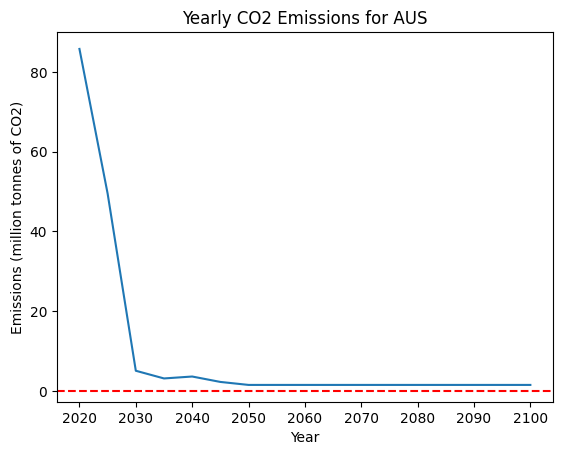

[85.75167711 78.5004325  71.2491879  63.99794329 56.74669869 49.49545408
 40.61696167 31.73846926 22.85997684 13.98148443  5.10299202  4.71759123
  4.33219043  3.94678963  3.56138884  3.17598804  3.27233824  3.36868844
  3.46503864  3.56138884  3.65773904  3.38653107  3.1153231   2.84411513
  2.57290717  2.3016992   2.15182111  2.00194302  1.85206494  1.70218685
  1.55230876  1.55230876  1.55230876  1.55230876  1.55230876  1.55230876
  1.55230876  1.55230876  1.55230876  1.55230876  1.55230876  1.55230876
  1.55230876  1.55230876  1.55230876  1.55230876  1.55230876  1.55230876
  1.55230876  1.55230876  1.55230876  1.55230876  1.55230876  1.55230876
  1.55230876  1.55230876  1.55230876  1.55230876  1.55230876  1.55230876
  1.55230876  1.55230876  1.55230876  1.55230876  1.55230876  1.55230876
  1.55230876  1.55230876  1.55230876  1.55230876  1.55230876  1.55230876
  1.55230876  1.55230876  1.55230876  1.55230876  1.55230876  1.55230876
  1.55230876  1.55230876  1.55230876]


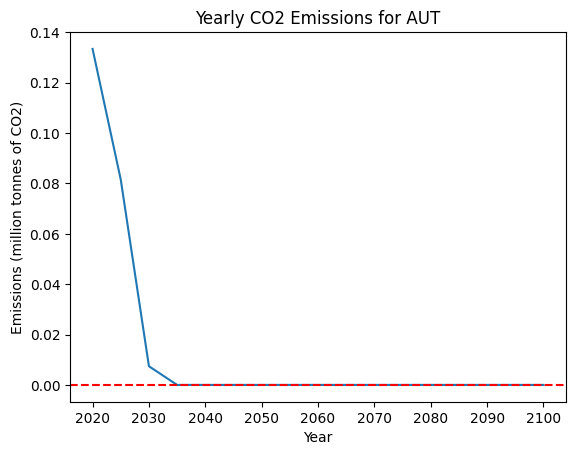

[0.13340092 0.12302529 0.11264967 0.10227404 0.09189841 0.08152278
 0.06670046 0.05187814 0.03705581 0.02223349 0.00741116 0.00592893
 0.0044467  0.00296446 0.00148223 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


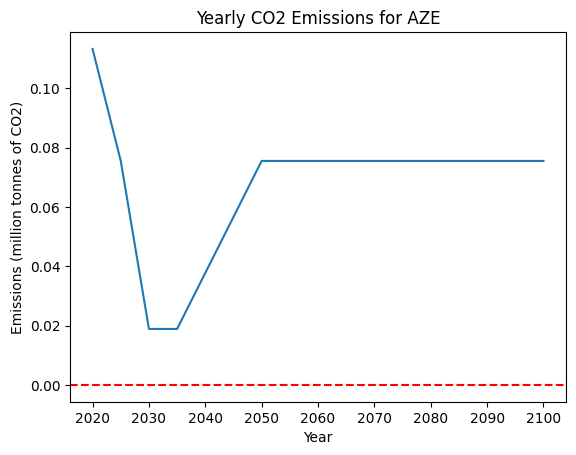

[0.11333333 0.10577778 0.09822222 0.09066667 0.08311111 0.07555556
 0.06422222 0.05288889 0.04155556 0.03022222 0.01888889 0.01888889
 0.01888889 0.01888889 0.01888889 0.01888889 0.02266667 0.02644444
 0.03022222 0.034      0.03777778 0.04155556 0.04533333 0.04911111
 0.05288889 0.05666667 0.06044444 0.06422222 0.068      0.07177778
 0.07555556 0.07555556 0.07555556 0.07555556 0.07555556 0.07555556
 0.07555556 0.07555556 0.07555556 0.07555556 0.07555556 0.07555556
 0.07555556 0.07555556 0.07555556 0.07555556 0.07555556 0.07555556
 0.07555556 0.07555556 0.07555556 0.07555556 0.07555556 0.07555556
 0.07555556 0.07555556 0.07555556 0.07555556 0.07555556 0.07555556
 0.07555556 0.07555556 0.07555556 0.07555556 0.07555556 0.07555556
 0.07555556 0.07555556 0.07555556 0.07555556 0.07555556 0.07555556
 0.07555556 0.07555556 0.07555556 0.07555556 0.07555556 0.07555556
 0.07555556 0.07555556 0.07555556]


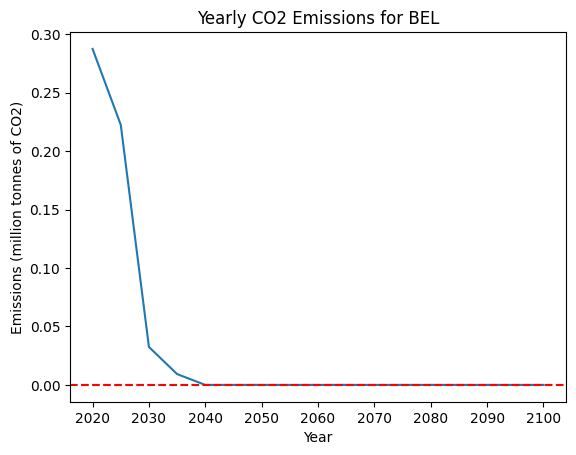

[0.28736216 0.27438452 0.26140687 0.24842923 0.23545158 0.22247393
 0.18446797 0.14646201 0.10845604 0.07045008 0.03244412 0.02780924
 0.02317437 0.01853949 0.01390462 0.00926975 0.0074158  0.00556185
 0.0037079  0.00185395 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


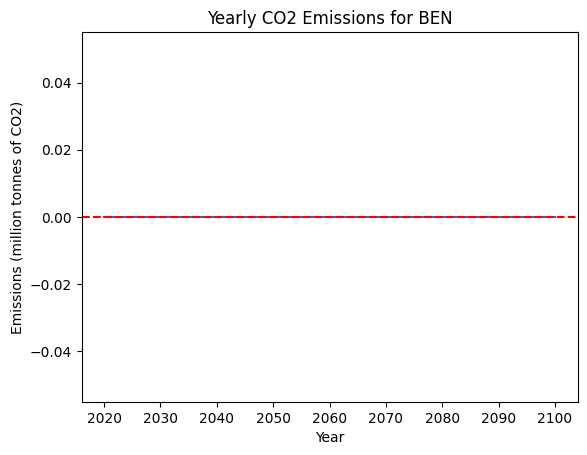

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


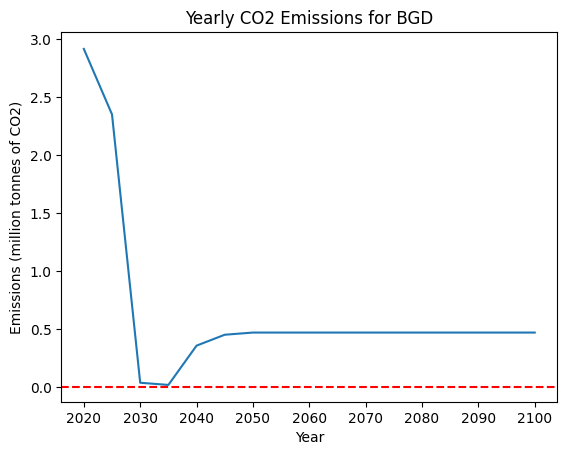

[2.91578142 2.80291247 2.69004351 2.57717455 2.46430559 2.35143663
 1.8886739  1.42591117 0.96314844 0.50038572 0.03762299 0.03386069
 0.03009839 0.02633609 0.02257379 0.01881149 0.08653287 0.15425424
 0.22197562 0.28969699 0.35741837 0.37622986 0.39504135 0.41385285
 0.43266434 0.45147583 0.45523813 0.45900043 0.46276273 0.46652503
 0.47028733 0.47028733 0.47028733 0.47028733 0.47028733 0.47028733
 0.47028733 0.47028733 0.47028733 0.47028733 0.47028733 0.47028733
 0.47028733 0.47028733 0.47028733 0.47028733 0.47028733 0.47028733
 0.47028733 0.47028733 0.47028733 0.47028733 0.47028733 0.47028733
 0.47028733 0.47028733 0.47028733 0.47028733 0.47028733 0.47028733
 0.47028733 0.47028733 0.47028733 0.47028733 0.47028733 0.47028733
 0.47028733 0.47028733 0.47028733 0.47028733 0.47028733 0.47028733
 0.47028733 0.47028733 0.47028733 0.47028733 0.47028733 0.47028733
 0.47028733 0.47028733 0.47028733]


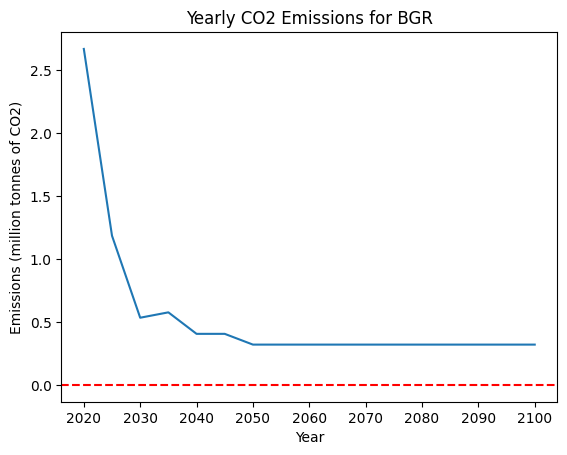

[2.66601597 2.369555   2.07309402 1.77663304 1.48017207 1.18371109
 1.05360951 0.92350793 0.79340635 0.66330477 0.53320319 0.54173445
 0.5502657  0.55879695 0.5673282  0.57585945 0.54173445 0.50760944
 0.47348444 0.43935943 0.40523443 0.40523443 0.40523443 0.40523443
 0.40523443 0.40523443 0.38817193 0.37110942 0.35404692 0.33698442
 0.31992192 0.31992192 0.31992192 0.31992192 0.31992192 0.31992192
 0.31992192 0.31992192 0.31992192 0.31992192 0.31992192 0.31992192
 0.31992192 0.31992192 0.31992192 0.31992192 0.31992192 0.31992192
 0.31992192 0.31992192 0.31992192 0.31992192 0.31992192 0.31992192
 0.31992192 0.31992192 0.31992192 0.31992192 0.31992192 0.31992192
 0.31992192 0.31992192 0.31992192 0.31992192 0.31992192 0.31992192
 0.31992192 0.31992192 0.31992192 0.31992192 0.31992192 0.31992192
 0.31992192 0.31992192 0.31992192 0.31992192 0.31992192 0.31992192
 0.31992192 0.31992192 0.31992192]


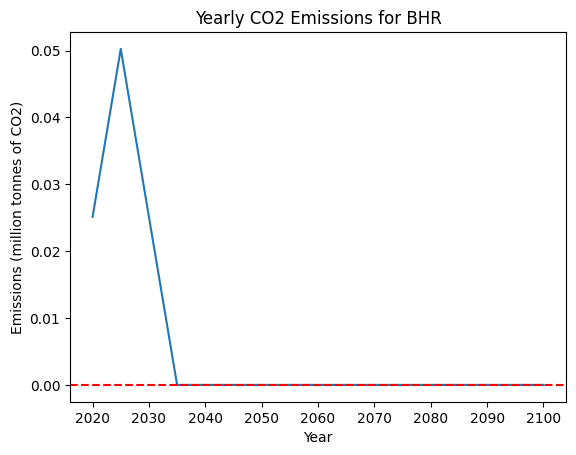

[0.02512237 0.03014684 0.03517131 0.04019579 0.04522026 0.05024473
 0.04522026 0.04019579 0.03517131 0.03014684 0.02512237 0.02009789
 0.01507342 0.01004895 0.00502447 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


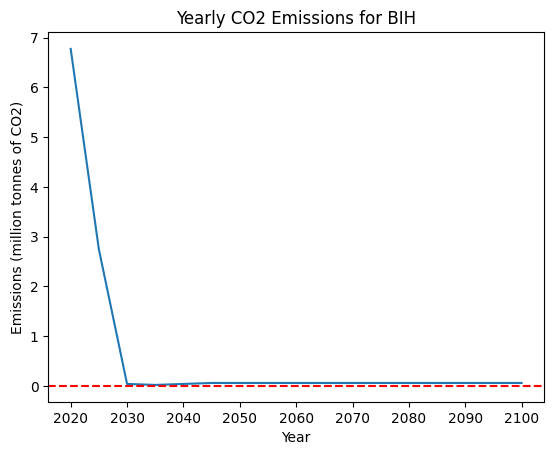

[6.77556007 5.96960424 5.1636484  4.35769257 3.55173674 2.7457809
 2.20452625 1.6632716  1.12201694 0.58076229 0.03950764 0.03555688
 0.03160611 0.02765535 0.02370458 0.01975382 0.02370458 0.02765535
 0.03160611 0.03555688 0.03950764 0.0434584  0.04740917 0.05135993
 0.05531069 0.05926146 0.05926146 0.05926146 0.05926146 0.05926146
 0.05926146 0.05926146 0.05926146 0.05926146 0.05926146 0.05926146
 0.05926146 0.05926146 0.05926146 0.05926146 0.05926146 0.05926146
 0.05926146 0.05926146 0.05926146 0.05926146 0.05926146 0.05926146
 0.05926146 0.05926146 0.05926146 0.05926146 0.05926146 0.05926146
 0.05926146 0.05926146 0.05926146 0.05926146 0.05926146 0.05926146
 0.05926146 0.05926146 0.05926146 0.05926146 0.05926146 0.05926146
 0.05926146 0.05926146 0.05926146 0.05926146 0.05926146 0.05926146
 0.05926146 0.05926146 0.05926146 0.05926146 0.05926146 0.05926146
 0.05926146 0.05926146 0.05926146]


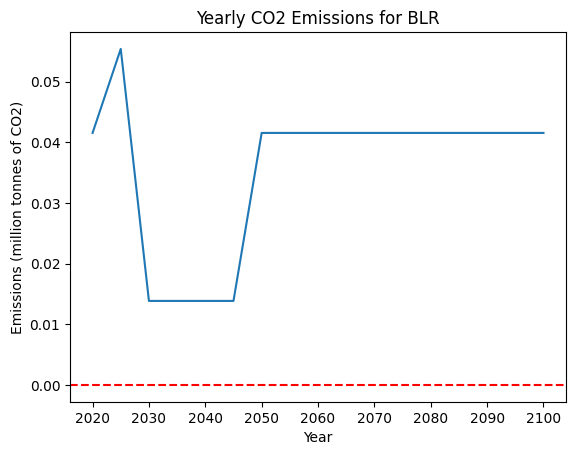

[0.04155855 0.04432912 0.04709969 0.04987026 0.05264083 0.0554114
 0.04709969 0.03878798 0.03047627 0.02216456 0.01385285 0.01385285
 0.01385285 0.01385285 0.01385285 0.01385285 0.01385285 0.01385285
 0.01385285 0.01385285 0.01385285 0.01385285 0.01385285 0.01385285
 0.01385285 0.01385285 0.01939399 0.02493513 0.03047627 0.03601741
 0.04155855 0.04155855 0.04155855 0.04155855 0.04155855 0.04155855
 0.04155855 0.04155855 0.04155855 0.04155855 0.04155855 0.04155855
 0.04155855 0.04155855 0.04155855 0.04155855 0.04155855 0.04155855
 0.04155855 0.04155855 0.04155855 0.04155855 0.04155855 0.04155855
 0.04155855 0.04155855 0.04155855 0.04155855 0.04155855 0.04155855
 0.04155855 0.04155855 0.04155855 0.04155855 0.04155855 0.04155855
 0.04155855 0.04155855 0.04155855 0.04155855 0.04155855 0.04155855
 0.04155855 0.04155855 0.04155855 0.04155855 0.04155855 0.04155855
 0.04155855 0.04155855 0.04155855]


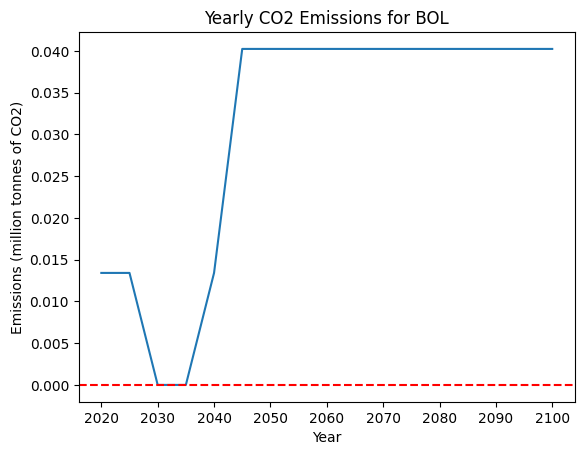

[0.01341477 0.01341477 0.01341477 0.01341477 0.01341477 0.01341477
 0.01073182 0.00804886 0.00536591 0.00268295 0.         0.
 0.         0.         0.         0.         0.00268295 0.00536591
 0.00804886 0.01073182 0.01341477 0.01878068 0.02414659 0.02951249
 0.0348784  0.04024431 0.04024431 0.04024431 0.04024431 0.04024431
 0.04024431 0.04024431 0.04024431 0.04024431 0.04024431 0.04024431
 0.04024431 0.04024431 0.04024431 0.04024431 0.04024431 0.04024431
 0.04024431 0.04024431 0.04024431 0.04024431 0.04024431 0.04024431
 0.04024431 0.04024431 0.04024431 0.04024431 0.04024431 0.04024431
 0.04024431 0.04024431 0.04024431 0.04024431 0.04024431 0.04024431
 0.04024431 0.04024431 0.04024431 0.04024431 0.04024431 0.04024431
 0.04024431 0.04024431 0.04024431 0.04024431 0.04024431 0.04024431
 0.04024431 0.04024431 0.04024431 0.04024431 0.04024431 0.04024431
 0.04024431 0.04024431 0.04024431]


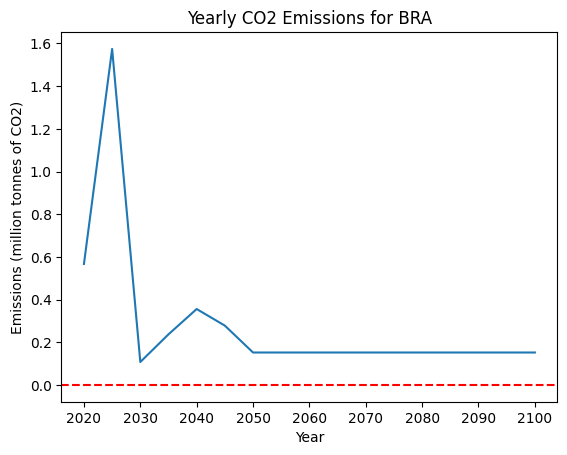

[0.56677035 0.7682887  0.96980705 1.1713254  1.37284374 1.57436209
 1.28097508 0.98758808 0.69420107 0.40081407 0.10742706 0.13335773
 0.1592884  0.18521907 0.21114974 0.23708041 0.26078845 0.28449649
 0.30820453 0.33191257 0.35562061 0.34006221 0.32450381 0.30894541
 0.29338701 0.2778286  0.25263881 0.22744902 0.20225922 0.17706943
 0.15187964 0.15187964 0.15187964 0.15187964 0.15187964 0.15187964
 0.15187964 0.15187964 0.15187964 0.15187964 0.15187964 0.15187964
 0.15187964 0.15187964 0.15187964 0.15187964 0.15187964 0.15187964
 0.15187964 0.15187964 0.15187964 0.15187964 0.15187964 0.15187964
 0.15187964 0.15187964 0.15187964 0.15187964 0.15187964 0.15187964
 0.15187964 0.15187964 0.15187964 0.15187964 0.15187964 0.15187964
 0.15187964 0.15187964 0.15187964 0.15187964 0.15187964 0.15187964
 0.15187964 0.15187964 0.15187964 0.15187964 0.15187964 0.15187964
 0.15187964 0.15187964 0.15187964]


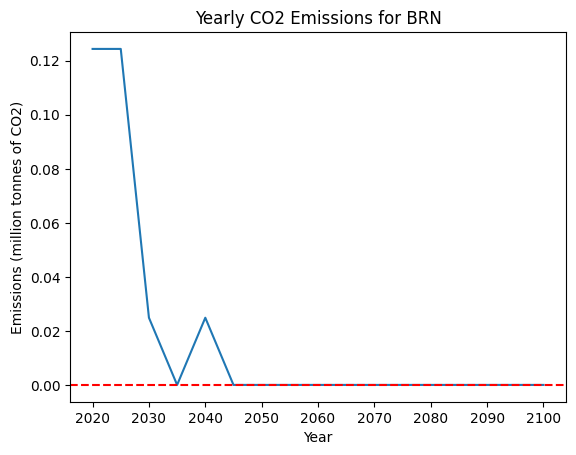

[0.12437089 0.12437089 0.12437089 0.12437089 0.12437089 0.12437089
 0.10447155 0.0845722  0.06467286 0.04477352 0.02487418 0.01989934
 0.01492451 0.00994967 0.00497484 0.         0.00497484 0.00994967
 0.01492451 0.01989934 0.02487418 0.01989934 0.01492451 0.00994967
 0.00497484 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


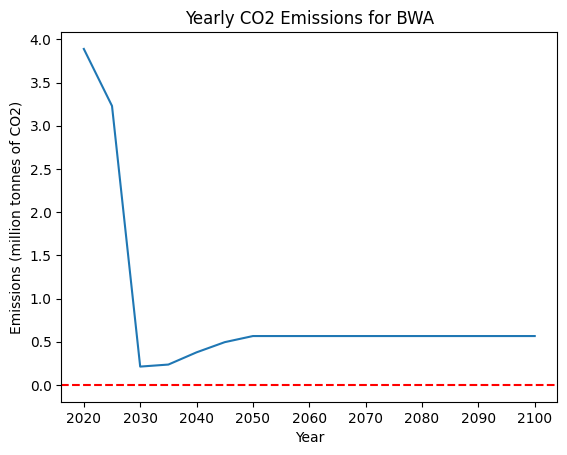

[3.88952593 3.75751778 3.62550963 3.49350147 3.36149332 3.22948517
 2.62601933 2.02255349 1.41908764 0.8156218  0.21215596 0.21687054
 0.22158511 0.22629969 0.23101427 0.23572884 0.26401631 0.29230377
 0.32059123 0.34887869 0.37716615 0.40073904 0.42431192 0.4478848
 0.47145769 0.49503057 0.5091743  0.52331803 0.53746177 0.5516055
 0.56574923 0.56574923 0.56574923 0.56574923 0.56574923 0.56574923
 0.56574923 0.56574923 0.56574923 0.56574923 0.56574923 0.56574923
 0.56574923 0.56574923 0.56574923 0.56574923 0.56574923 0.56574923
 0.56574923 0.56574923 0.56574923 0.56574923 0.56574923 0.56574923
 0.56574923 0.56574923 0.56574923 0.56574923 0.56574923 0.56574923
 0.56574923 0.56574923 0.56574923 0.56574923 0.56574923 0.56574923
 0.56574923 0.56574923 0.56574923 0.56574923 0.56574923 0.56574923
 0.56574923 0.56574923 0.56574923 0.56574923 0.56574923 0.56574923
 0.56574923 0.56574923 0.56574923]


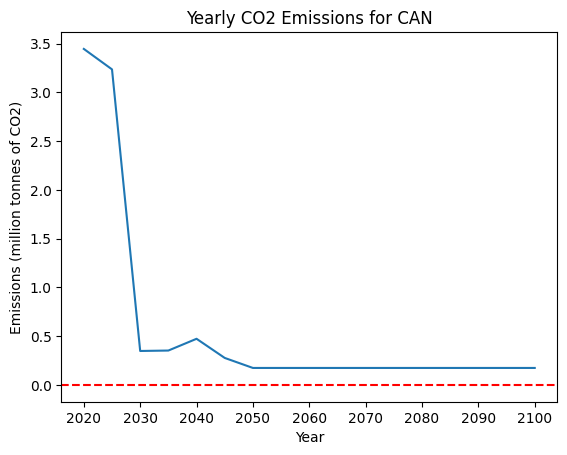

[3.44497516 3.40302857 3.36108198 3.31913539 3.2771888  3.23524222
 2.65780726 2.0803723  1.50293735 0.92550239 0.34806744 0.34895992
 0.3498524  0.35074488 0.35163736 0.35252984 0.37662682 0.40072379
 0.42482077 0.44891775 0.47301472 0.43374558 0.39447643 0.35520728
 0.31593814 0.27666899 0.25614194 0.23561488 0.21508783 0.19456077
 0.17403372 0.17403372 0.17403372 0.17403372 0.17403372 0.17403372
 0.17403372 0.17403372 0.17403372 0.17403372 0.17403372 0.17403372
 0.17403372 0.17403372 0.17403372 0.17403372 0.17403372 0.17403372
 0.17403372 0.17403372 0.17403372 0.17403372 0.17403372 0.17403372
 0.17403372 0.17403372 0.17403372 0.17403372 0.17403372 0.17403372
 0.17403372 0.17403372 0.17403372 0.17403372 0.17403372 0.17403372
 0.17403372 0.17403372 0.17403372 0.17403372 0.17403372 0.17403372
 0.17403372 0.17403372 0.17403372 0.17403372 0.17403372 0.17403372
 0.17403372 0.17403372 0.17403372]


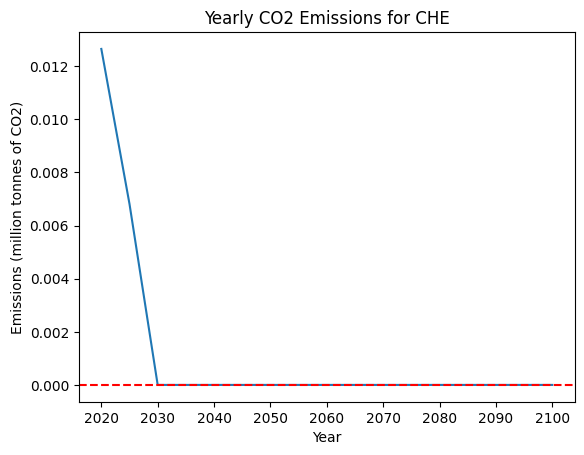

[0.01265392 0.01148586 0.01031781 0.00914976 0.0079817  0.00681365
 0.00545092 0.00408819 0.00272546 0.00136273 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


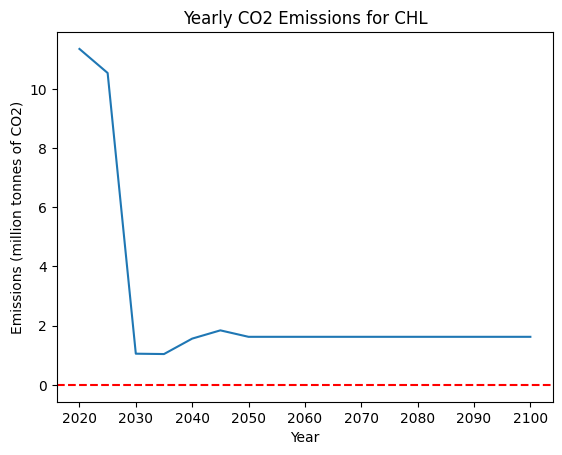

[11.3463662  11.18392891 11.02149161 10.85905432 10.69661702 10.53417973
  8.63826982  6.74235992  4.84645001  2.9505401   1.05463019  1.05220575
  1.04978132  1.04735688  1.04493244  1.04250801  1.14675881  1.25100961
  1.35526041  1.45951121  1.56376201  1.61952406  1.67528612  1.73104818
  1.78681023  1.84257229  1.79893242  1.75529255  1.71165268  1.66801281
  1.62437294  1.62437294  1.62437294  1.62437294  1.62437294  1.62437294
  1.62437294  1.62437294  1.62437294  1.62437294  1.62437294  1.62437294
  1.62437294  1.62437294  1.62437294  1.62437294  1.62437294  1.62437294
  1.62437294  1.62437294  1.62437294  1.62437294  1.62437294  1.62437294
  1.62437294  1.62437294  1.62437294  1.62437294  1.62437294  1.62437294
  1.62437294  1.62437294  1.62437294  1.62437294  1.62437294  1.62437294
  1.62437294  1.62437294  1.62437294  1.62437294  1.62437294  1.62437294
  1.62437294  1.62437294  1.62437294  1.62437294  1.62437294  1.62437294
  1.62437294  1.62437294  1.62437294]


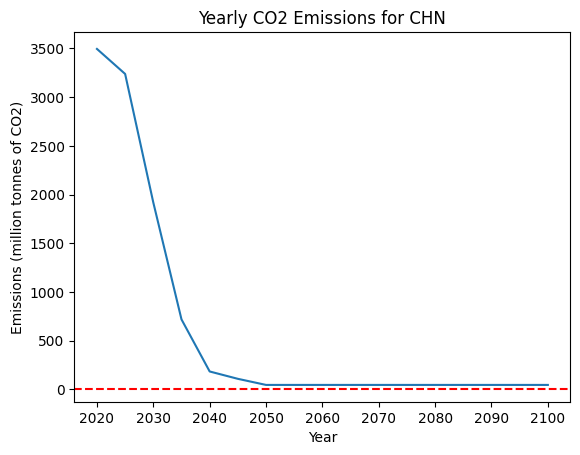

[3494.46863348 3443.1253535  3391.78207351 3340.43879353 3289.09551354
 3237.75223356 2973.82136856 2709.89050356 2445.95963856 2182.02877355
 1918.09790855 1678.30619913 1438.51448971 1198.72278028  958.93107086
  719.13936144  612.24604755  505.35273367  398.45941978  291.5661059
  184.67279202  169.59381901  154.51484601  139.435873    124.3569
  109.27792699   96.77218056   84.26643413   71.7606877    59.25494127
   46.74919484   46.74919484   46.74919484   46.74919484   46.74919484
   46.74919484   46.74919484   46.74919484   46.74919484   46.74919484
   46.74919484   46.74919484   46.74919484   46.74919484   46.74919484
   46.74919484   46.74919484   46.74919484   46.74919484   46.74919484
   46.74919484   46.74919484   46.74919484   46.74919484   46.74919484
   46.74919484   46.74919484   46.74919484   46.74919484   46.74919484
   46.74919484   46.74919484   46.74919484   46.74919484   46.74919484
   46.74919484   46.74919484   46.74919484   46.74919484   46.74919484
   46.74919

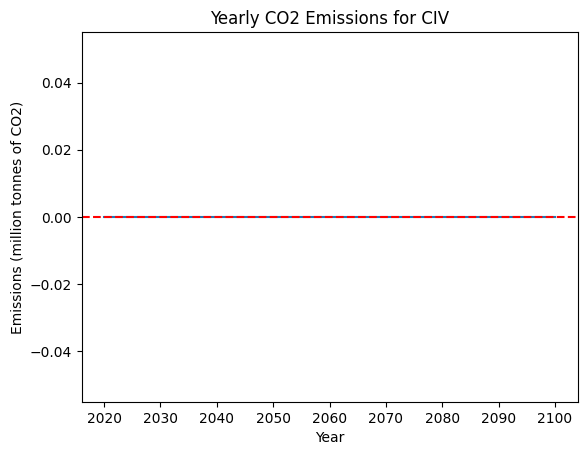

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


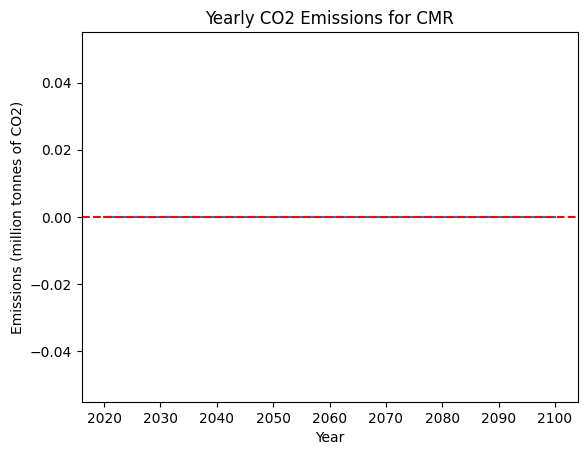

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


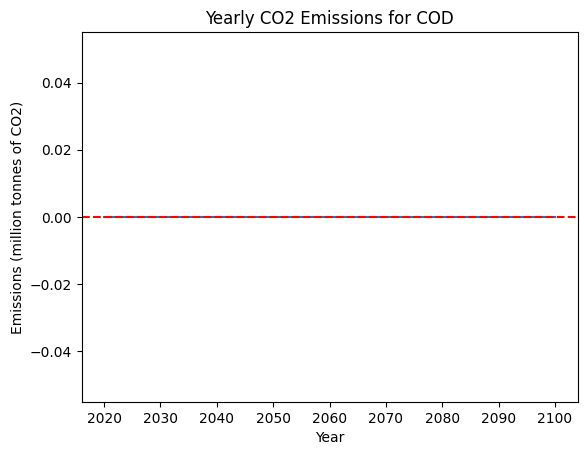

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


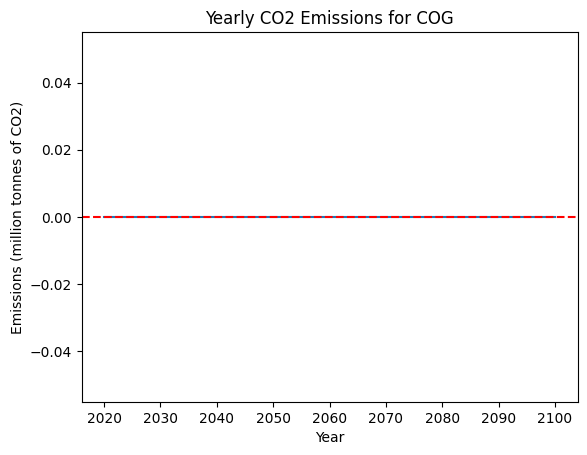

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


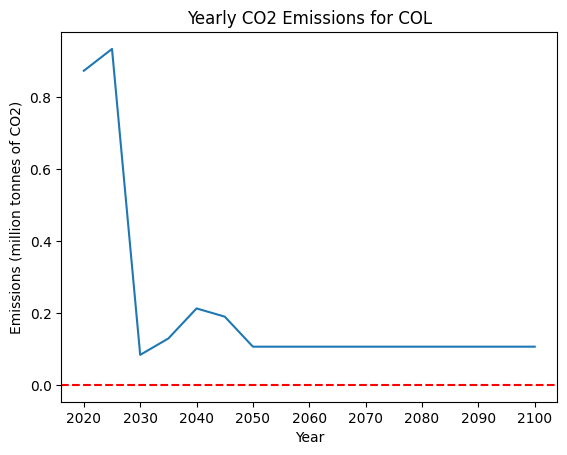

[0.87273864 0.88488109 0.89702354 0.90916599 0.92130844 0.9334509
 0.76345659 0.59346228 0.42346797 0.25347366 0.08347935 0.09258619
 0.10169302 0.11079986 0.1199067  0.12901354 0.14570941 0.16240528
 0.17910115 0.19579702 0.21249289 0.20793947 0.20338605 0.19883263
 0.19427921 0.18972579 0.17302992 0.15633405 0.13963818 0.12294231
 0.10624644 0.10624644 0.10624644 0.10624644 0.10624644 0.10624644
 0.10624644 0.10624644 0.10624644 0.10624644 0.10624644 0.10624644
 0.10624644 0.10624644 0.10624644 0.10624644 0.10624644 0.10624644
 0.10624644 0.10624644 0.10624644 0.10624644 0.10624644 0.10624644
 0.10624644 0.10624644 0.10624644 0.10624644 0.10624644 0.10624644
 0.10624644 0.10624644 0.10624644 0.10624644 0.10624644 0.10624644
 0.10624644 0.10624644 0.10624644 0.10624644 0.10624644 0.10624644
 0.10624644 0.10624644 0.10624644 0.10624644 0.10624644 0.10624644
 0.10624644 0.10624644 0.10624644]


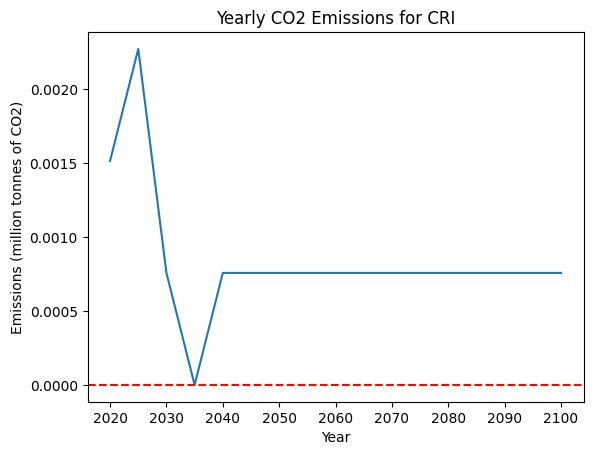

[0.00151558 0.00166714 0.0018187  0.00197026 0.00212181 0.00227337
 0.00197026 0.00166714 0.00136402 0.00106091 0.00075779 0.00060623
 0.00045467 0.00030312 0.00015156 0.         0.00015156 0.00030312
 0.00045467 0.00060623 0.00075779 0.00075779 0.00075779 0.00075779
 0.00075779 0.00075779 0.00075779 0.00075779 0.00075779 0.00075779
 0.00075779 0.00075779 0.00075779 0.00075779 0.00075779 0.00075779
 0.00075779 0.00075779 0.00075779 0.00075779 0.00075779 0.00075779
 0.00075779 0.00075779 0.00075779 0.00075779 0.00075779 0.00075779
 0.00075779 0.00075779 0.00075779 0.00075779 0.00075779 0.00075779
 0.00075779 0.00075779 0.00075779 0.00075779 0.00075779 0.00075779
 0.00075779 0.00075779 0.00075779 0.00075779 0.00075779 0.00075779
 0.00075779 0.00075779 0.00075779 0.00075779 0.00075779 0.00075779
 0.00075779 0.00075779 0.00075779 0.00075779 0.00075779 0.00075779
 0.00075779 0.00075779 0.00075779]


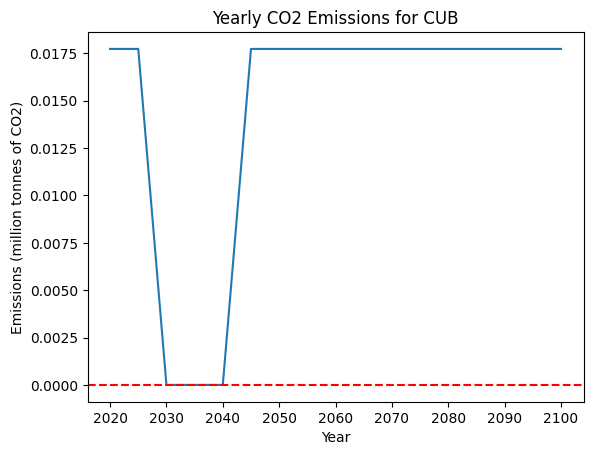

[0.01773112 0.01773112 0.01773112 0.01773112 0.01773112 0.01773112
 0.01418489 0.01063867 0.00709245 0.00354622 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00354622 0.00709245 0.01063867
 0.01418489 0.01773112 0.01773112 0.01773112 0.01773112 0.01773112
 0.01773112 0.01773112 0.01773112 0.01773112 0.01773112 0.01773112
 0.01773112 0.01773112 0.01773112 0.01773112 0.01773112 0.01773112
 0.01773112 0.01773112 0.01773112 0.01773112 0.01773112 0.01773112
 0.01773112 0.01773112 0.01773112 0.01773112 0.01773112 0.01773112
 0.01773112 0.01773112 0.01773112 0.01773112 0.01773112 0.01773112
 0.01773112 0.01773112 0.01773112 0.01773112 0.01773112 0.01773112
 0.01773112 0.01773112 0.01773112 0.01773112 0.01773112 0.01773112
 0.01773112 0.01773112 0.01773112 0.01773112 0.01773112 0.01773112
 0.01773112 0.01773112 0.01773112]


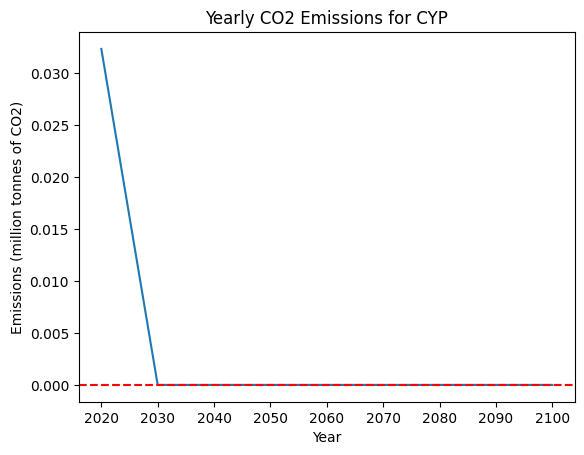

[0.03230241 0.02907217 0.02584192 0.02261168 0.01938144 0.0161512
 0.01292096 0.00969072 0.00646048 0.00323024 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


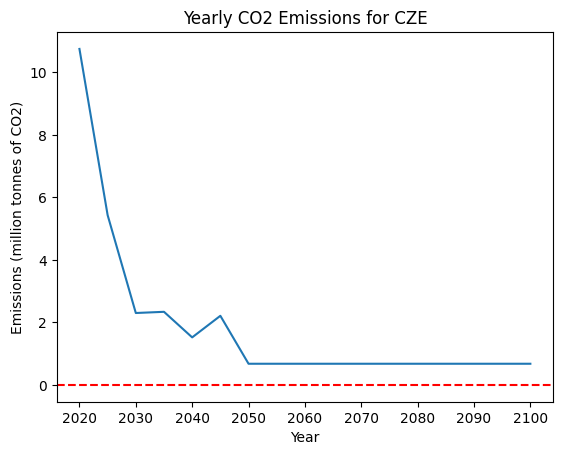

[10.75019463  9.68667954  8.62316445  7.55964935  6.49613426  5.43261917
  4.80627013  4.1799211   3.55357207  2.92722303  2.300874    2.30854358
  2.31621316  2.32388274  2.33155232  2.3392219   2.17560419  2.01198649
  1.84836878  1.68475107  1.52113337  1.65918581  1.79723825  1.93529069
  2.07334313  2.21139557  1.90461237  1.59782917  1.29104597  0.98426277
  0.67747957  0.67747957  0.67747957  0.67747957  0.67747957  0.67747957
  0.67747957  0.67747957  0.67747957  0.67747957  0.67747957  0.67747957
  0.67747957  0.67747957  0.67747957  0.67747957  0.67747957  0.67747957
  0.67747957  0.67747957  0.67747957  0.67747957  0.67747957  0.67747957
  0.67747957  0.67747957  0.67747957  0.67747957  0.67747957  0.67747957
  0.67747957  0.67747957  0.67747957  0.67747957  0.67747957  0.67747957
  0.67747957  0.67747957  0.67747957  0.67747957  0.67747957  0.67747957
  0.67747957  0.67747957  0.67747957  0.67747957  0.67747957  0.67747957
  0.67747957  0.67747957  0.67747957]


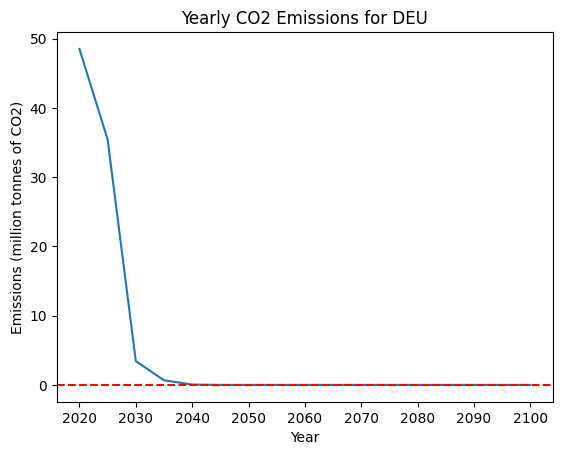

[4.85178835e+01 4.59018102e+01 4.32857370e+01 4.06696638e+01
 3.80535906e+01 3.54375174e+01 2.90376223e+01 2.26377272e+01
 1.62378321e+01 9.83793695e+00 3.43804183e+00 2.88479372e+00
 2.33154561e+00 1.77829750e+00 1.22504939e+00 6.71801278e-01
 5.47320453e-01 4.22839628e-01 2.98358803e-01 1.73877978e-01
 4.93971528e-02 3.95177222e-02 2.96382917e-02 1.97588611e-02
 9.87943056e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

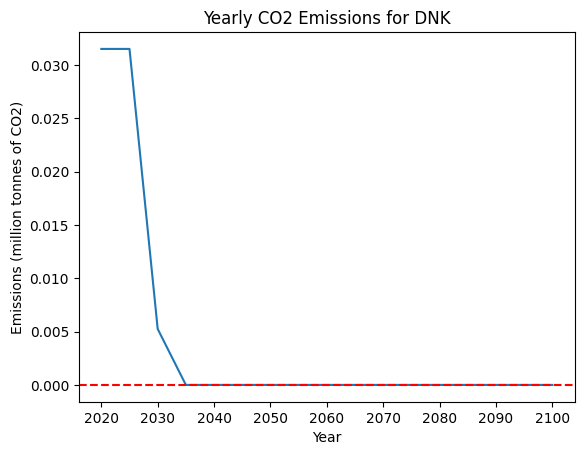

[0.03149056 0.03149056 0.03149056 0.03149056 0.03149056 0.03149056
 0.02624213 0.0209937  0.01574528 0.01049685 0.00524843 0.00419874
 0.00314906 0.00209937 0.00104969 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


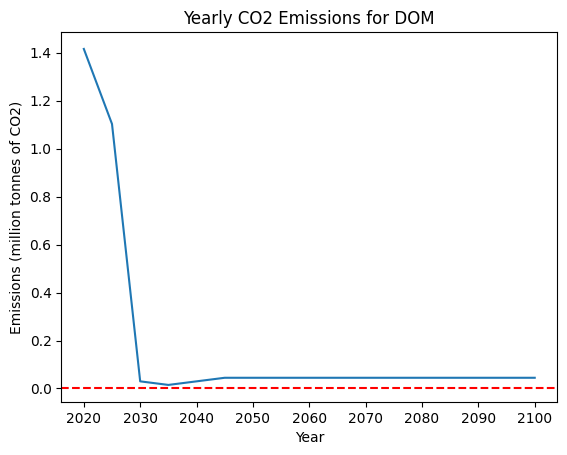

[1.41526144 1.35269199 1.29012254 1.22755308 1.16498363 1.10241418
 0.88789034 0.6733665  0.45884266 0.24431882 0.02979498 0.02681548
 0.02383598 0.02085648 0.01787699 0.01489749 0.01787699 0.02085648
 0.02383598 0.02681548 0.02979498 0.03277448 0.03575397 0.03873347
 0.04171297 0.04469247 0.04469247 0.04469247 0.04469247 0.04469247
 0.04469247 0.04469247 0.04469247 0.04469247 0.04469247 0.04469247
 0.04469247 0.04469247 0.04469247 0.04469247 0.04469247 0.04469247
 0.04469247 0.04469247 0.04469247 0.04469247 0.04469247 0.04469247
 0.04469247 0.04469247 0.04469247 0.04469247 0.04469247 0.04469247
 0.04469247 0.04469247 0.04469247 0.04469247 0.04469247 0.04469247
 0.04469247 0.04469247 0.04469247 0.04469247 0.04469247 0.04469247
 0.04469247 0.04469247 0.04469247 0.04469247 0.04469247 0.04469247
 0.04469247 0.04469247 0.04469247 0.04469247 0.04469247 0.04469247
 0.04469247 0.04469247 0.04469247]


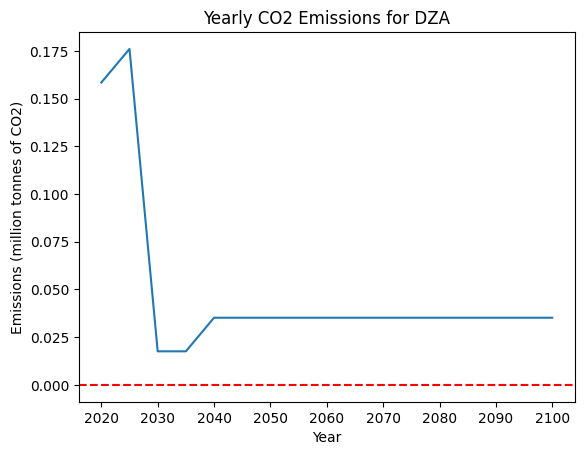

[0.1584196  0.16194004 0.16546047 0.16898091 0.17250134 0.17602178
 0.14433786 0.11265394 0.08097002 0.0492861  0.01760218 0.01760218
 0.01760218 0.01760218 0.01760218 0.01760218 0.02112261 0.02464305
 0.02816348 0.03168392 0.03520436 0.03520436 0.03520436 0.03520436
 0.03520436 0.03520436 0.03520436 0.03520436 0.03520436 0.03520436
 0.03520436 0.03520436 0.03520436 0.03520436 0.03520436 0.03520436
 0.03520436 0.03520436 0.03520436 0.03520436 0.03520436 0.03520436
 0.03520436 0.03520436 0.03520436 0.03520436 0.03520436 0.03520436
 0.03520436 0.03520436 0.03520436 0.03520436 0.03520436 0.03520436
 0.03520436 0.03520436 0.03520436 0.03520436 0.03520436 0.03520436
 0.03520436 0.03520436 0.03520436 0.03520436 0.03520436 0.03520436
 0.03520436 0.03520436 0.03520436 0.03520436 0.03520436 0.03520436
 0.03520436 0.03520436 0.03520436 0.03520436 0.03520436 0.03520436
 0.03520436 0.03520436 0.03520436]


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('float64'), dtype('<U14')) -> None

In [20]:
years = [year for year in range(2020, 2101)]

#emission_factor = 7.5* 10**(-7) #million tonnes of CO2 / MWh --> coal emission factor for Poland


for idx, row in df_coal.iterrows():
    vals = []
    for year in years:
        vals.append(row[str(year)])


    #cumulative_vals = np.cumsum(np.array(vals))    
    country = row["Region"]
    emission_factor = get_emission_intensity(country) #finding the relevant emission intensity in each country
    
    vals = np.array(vals)
    vals = vals * emission_factor /10**9 #converting to million tonnes of CO2
    plt.plot(years, vals)
    plt.axhline(y=0, color='r', linestyle='--', label='y=0')
    plt.xticks(years[::10])
    plt.xlabel('Year')
    plt.ylabel('Emissions (million tonnes of CO2)')
    plt.title(f"Yearly CO2 Emissions for {row.Region}")
    plt.show()
    print(vals)

